Number of samples: 1000


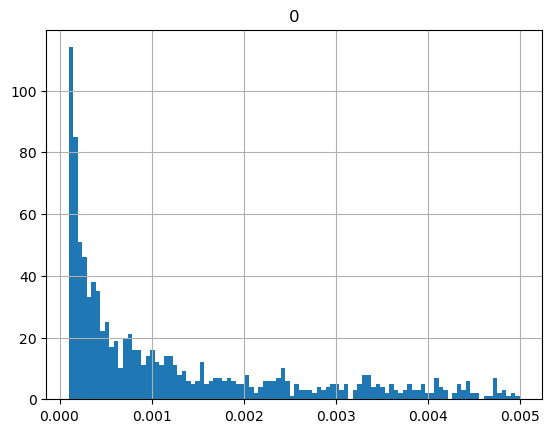

In [6]:
import ray
from ray import tune
import numpy as np
import matplotlib.pyplot as plt
# Create a quantized uniform distribution from 1 to 4 with step size 1
distribution = tune.choice([1.0, 2.0, 3.0, 4.0])  # 
distribution = tune.randint(1,5)
distribution = tune.qlograndint(0.1, 4, 2)
distribution = tune.qloguniform(8e-4, 7e-3, 1e-5)
distribution = tune.loguniform(1e-4, 1e-2, 1e-4)
distribution = tune.loguniform(1e-4,5e-3)
# Generate 100 samples from this distribution
np.random.seed(42)  # For reproducibility
samples = [distribution.sample() for _ in range(1000)]

# Print summary statistics
print(f"Number of samples: {len(samples)}")
if False:
    print(f"Unique values: {sorted(set(samples))}")
    print(f"Value counts: {np.unique(samples, return_counts=True)[1]}")

import pandas as pd 
bins = 100 #4 
pd.DataFrame(samples).hist(bins = bins)
plt.show()

<bound method Domain.is_function of <ray.tune.search.sample.Float object at 0x7f48f8483f50>>

In [ ]:
from ray import tune 
import pandas as pd
choices = [8,16,32,64,128,256]
distrib1 = tune.choice(choices)

n = 1000

samples =[np.log2(distrib1.sample()) for k in range(n)]
df_samples = pd.DataFrame(samples,columns = ['sample'])
df_samples.hist(bins = len(choices))